In [16]:
#  Author:- Ravi Prakash # email:- ravistar85@yahoo.com

# importing libraries

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.display import display, HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
!pip install folium
import folium
import plotly.graph_objects as go
import seaborn as sns
import ipywidgets as widgets

In [17]:
# loading data right from the source:
death_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
country_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')

In [6]:
# confirmed_df.head()

In [ ]:
# recovered_df.head()

In [ ]:
# death_df.head()

In [8]:
# country_df.head()

In [18]:
# data cleaning

# renaming the df column names to lowercase
country_df.columns = map(str.lower, country_df.columns)
confirmed_df.columns = map(str.lower, confirmed_df.columns)
death_df.columns = map(str.lower, death_df.columns)
recovered_df.columns = map(str.lower, recovered_df.columns)

# changing province/state to state and country/region to country
confirmed_df = confirmed_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
recovered_df = confirmed_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
death_df = death_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
country_df = country_df.rename(columns={'country_region': 'country'})
# country_df.head()

In [19]:
# total number of confirmed, death and recovered cases
confirmed_total = int(country_df['confirmed'].sum())
deaths_total = int(country_df['deaths'].sum())
recovered_total = int(country_df['recovered'].sum())
active_total = int(country_df['active'].sum())

In [20]:
# displaying the total stats

display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color: #fff; font-size:30px;'> Confirmed: "  + str(confirmed_total) +"</span>" +
             "<span style='color: red; font-size:30px;margin-left:20px;'> Deaths: " + str(deaths_total) + "</span>"+
             "<span style='color: lightgreen; font-size:30px; margin-left:20px;'> Recovered: " + str(recovered_total) + "</span>"+
             "</div>")
       )

In [21]:
#  Author:- Ravi Prakash # email:- ravistar85@yahoo.com
# sorting the values by confirmed descednding order
# country_df.sort_values('confirmed', ascending= False).head(10).style.background_gradient(cmap='copper')
fig = go.FigureWidget( layout=go.Layout() )
def highlight_col(x):
    r = 'background-color: red'
    y = 'background-color: purple'
    g = 'background-color: grey'
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    df1.iloc[:, 4] = y
    df1.iloc[:, 5] = r
    df1.iloc[:, 6] = g
    
    return df1

def show_latest_cases(n):
    n = int(n)
    return country_df.sort_values('confirmed', ascending= False).head(n).style.apply(highlight_col, axis=None)

interact(show_latest_cases, n='10')

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none' # uncomment this, run cell again - then the graph/figure disappears
widgets.VBox([fig], layout=ipywLayout)

,country,last_update,lat,long_,confirmed,deaths,recovered,active,incident_rate,people_tested,people_hospitalized,mortality_rate,uid,iso3
17,US,2020-05-25 06:32:44,40.000000,-100.000000,1643499.000000,97722.000000,366736.000000,1207393.000000,498.836781,nan,nan,5.945973,840,USA
21,Brazil,2020-05-25 06:32:44,-14.235000,-51.925300,363211.000000,22666.000000,149911.000000,190634.000000,170.875052,nan,nan,6.240450,76,BRA
13,Russia,2020-05-25 06:32:44,61.524000,105.318800,344481.000000,3541.000000,113299.000000,227641.000000,236.051855,nan,nan,1.027923,643,RUS
16,United Kingdom,2020-05-25 06:32:44,55.000000,-3.000000,260916.000000,36875.000000,1151.000000,222890.000000,384.344319,nan,nan,14.132901,826,GBR
18,Spain,2020-05-25 06:32:44,40.463667,-3.749220,235772.000000,28752.000000,150376.000000,56644.000000,504.273541,nan,nan,12.194832,724,ESP
10,Italy,2020-05-25 06:32:44,41.871900,12.567400,229858.000000,32785.000000,140479.000000,56594.000000,380.170444,nan,nan,14.263154,380,ITA
6,France,2020-05-25 06:32:44,46.227600,2.213700,182709.000000,28370.000000,64735.000000,89604.000000,279.912930,nan,nan,15.527423,250,FRA
7,Germany,2020-05-25 06:32:44,51.165691,10.451526,180328.000000,8283.000000,160281.000000,11764.000000,215.229779,nan,nan,4.593297,276,DEU
175,Turkey,2020-05-25 06:32:44,38.963700,35.243300,156827.000000,4340.000000,118694.000000,33793.000000,185.948227,nan,nan,2.767381,792,TUR
90,India,2020-05-25 06:32:44,20.593684,78.962880,139049.000000,4024.000000,57721.000000,77304.000000,10.075982,nan,nan,2.893944,356,IND


    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

In [41]:
interact(plot_cases_of_a_country, country='World')

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none' # uncomment this, run cell again - then the graph/figure disappears
widgets.VBox([fig], layout=ipywLayout)

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

In [42]:
#  Author:- Ravi Prakash # email:- ravistar85@yahoo.com

world_map = folium.Map(location=[11,0], tiles="cartodbpositron", zoom_start=2, max_zoom = 6, min_zoom = 2)


for i in range(0,len(confirmed_df)):
    folium.Circle(
        location=[confirmed_df.iloc[i]['lat'], confirmed_df.iloc[i]['long']],
        fill=True,
        radius=(int((np.log(confirmed_df.iloc[i,-1]+1.00001)))+0.2)*50000,
        color='red',
        fill_color='indigo',
        tooltip = "<div style='margin: 0; background-color: black; color: white;'>"+
                    "<h4 style='text-align:center;font-weight: bold'>"+confirmed_df.iloc[i]['country'] + "</h4>"
                    "<hr style='margin:10px;color: white;'>"+
                    "<ul style='color: white;;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
                        "<li>Confirmed: "+str(confirmed_df.iloc[i,-1])+"</li>"+
                        "<li>Deaths:   "+str(death_df.iloc[i,-1])+"</li>"+
                        "<li>Death Rate: "+ str(np.round(death_df.iloc[i,-1]/(confirmed_df.iloc[i,-1]+1.00001)*100,2))+ "</li>"+
                    "</ul></div>",
        ).add_to(world_map)

world_map

           Date Country  Confirmed  Recovered  Deaths
79   2020-01-22   India          0          0       0
267  2020-01-23   India          0          0       0
455  2020-01-24   India          0          0       0


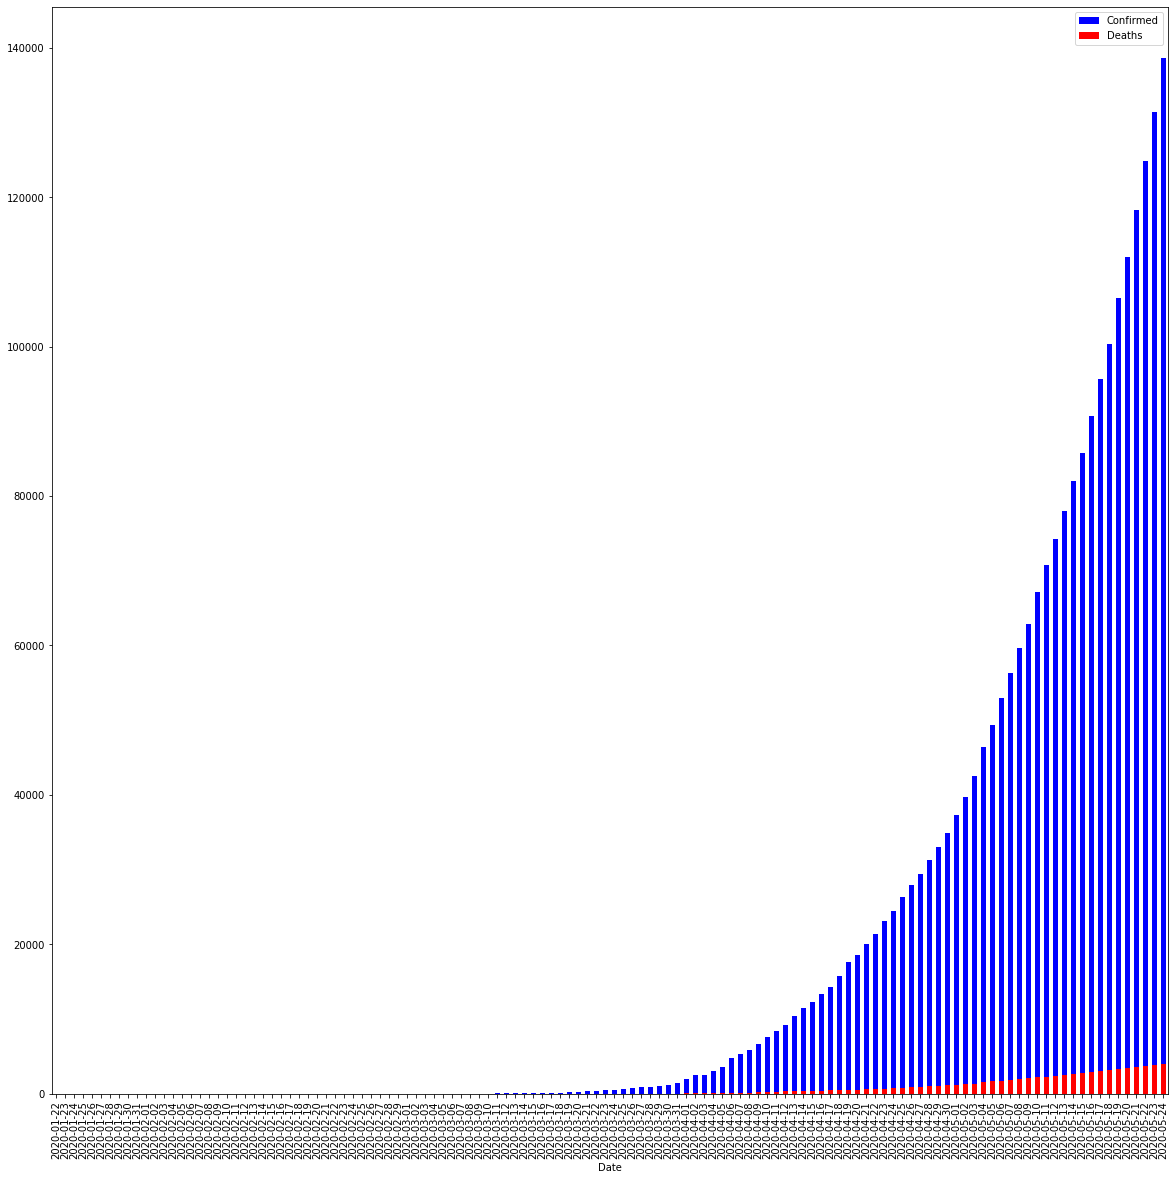

In [40]:
#  Author:- Ravi Prakash # email:- ravistar85@yahoo.com
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

#### ----- Step 1 (Download data)----
URL_DATASET = r'https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv'
df1 = pd.read_csv(URL_DATASET)
# print(df1.head(3))  # Uncomment to see the dataframe

#### ----- Step 2 (Select data for India)----
df_india = df1[df1['Country'] == 'India']
print(df_india.head(3))

#### ----- Step 3 (Plot data)----
# Increase size of plot
plt.rcParams["figure.figsize"]=20,20  # Remove if not on Jupyter
# Plot column 'Confirmed'
df_india.plot(kind = 'bar', x = 'Date', y = 'Confirmed', color = 'blue')

ax1 = plt.gca()
df_india.plot(kind = 'bar', x = 'Date', y = 'Deaths', color = 'red', ax = ax1)
plt.show()